In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import re
warnings.filterwarnings("ignore")

In [2]:
import nltk                                     #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec                                   #For Word2Vec

In [3]:
import re
temp =[]
snow = nltk.stem.SnowballStemmer('english')

In [4]:
train = pd.read_csv('train_file.csv')
test = pd.read_csv('test_file.csv')

In [5]:
train

,ID,UsageClass,CheckoutType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,Physical,Horizon,2005,4,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,2,Physical,Horizon,2005,4,1,London holiday / Richard Peck.,"Peck, Richard, 1934-",NaN,"Viking,",1998.,BOOK
2,3,Physical,Horizon,2005,4,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
3,4,Physical,Horizon,2005,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
4,5,Physical,Horizon,2005,4,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK
5,6,Physical,Horizon,2005,4,4,Minnie and Moo go dancing / [written and illus...,"Cazet, Denys","Cows Juvenile fiction, Parties Fiction, Farm l...","DK Pub.,",c1998.,BOOK
6,7,Physical,Horizon,2005,4,1,cat who robbed a bank,NaN,"Mystery fiction, Qwilleran Jim Fictitious char...",NaN,NaN,BOOK
7,8,Physical,Horizon,2005,4,1,Irwin guide to using the Wall Street journal,NaN,"Wall Street journal, Investments United States...",NaN,NaN,BOOK
8,9,Physical,Horizon,2005,4,4,Oracle night,NaN,Novelists American New York State New York Fic...,NaN,NaN,BOOK
9,10,Physical,Horizon,2005,4,1,12 haunted episodes,NaN,Rock music 1991 2000,NaN,NaN,SOUNDDISC


In [6]:
train.nunique(dropna = True)

ID                 31653
UsageClass             1
CheckoutType           1
CheckoutYear           1
CheckoutMonth          1
Checkouts             50
Title              31653
Creator             6731
Subjects           24755
Publisher           3519
PublicationYear      840
MaterialType           8
dtype: int64

In [7]:
train[train.Subjects.isnull()].index.values

array([    1,    42,   123, ..., 31611, 31642, 31652])

In [8]:
train.drop(labels = train[train.Subjects.isnull()].index.values, inplace =True)

In [9]:
train  = train.reset_index(drop =True)

In [10]:
train.drop(['UsageClass', 'CheckoutType' , 'CheckoutYear' , 'CheckoutMonth'], axis=1, inplace = True)

In [11]:
train.head()

,ID,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,MaterialType
0,1,1,Tidal wave,NaN,"Tsunamis, Tsunamis Juvenile literature",NaN,NaN,BOOK
1,3,3,Cinco de Mayo : celebrating Hispanic pride / C...,"Gnojewski, Carol",Cinco de Mayo Mexican holiday History Juvenile...,"Enslow Publishers,",c2002.,BOOK
2,4,1,Annapolis,NaN,"War stories, Historical fiction, Domestic fict...",NaN,NaN,BOOK
3,5,1,As a man thinketh,NaN,Thought and thinking,NaN,NaN,BOOK
4,6,4,Minnie and Moo go dancing / [written and illus...,"Cazet, Denys","Cows Juvenile fiction, Parties Fiction, Farm l...","DK Pub.,",c1998.,BOOK


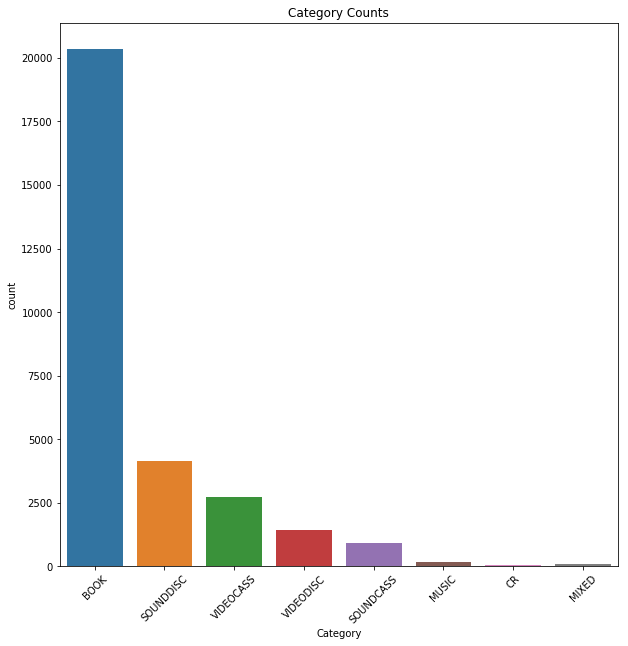

In [12]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(train['MaterialType'])
ax.set_title("Category Counts")
ax.set_xlabel("Category")
# Manipulate the labels to make them more readable
ax.set_xticklabels(train.MaterialType.value_counts().keys(), rotation = 45)
plt.show()
plt.show()

In [13]:
final_X = train.loc[:, ['Title' , 'Subjects']]
final_y = train['MaterialType']

In [14]:
final_X

,Title,Subjects
0,Tidal wave,"Tsunamis, Tsunamis Juvenile literature"
1,Cinco de Mayo : celebrating Hispanic pride / C...,Cinco de Mayo Mexican holiday History Juvenile...
2,Annapolis,"War stories, Historical fiction, Domestic fict..."
3,As a man thinketh,Thought and thinking
4,Minnie and Moo go dancing / [written and illus...,"Cows Juvenile fiction, Parties Fiction, Farm l..."
5,cat who robbed a bank,"Mystery fiction, Qwilleran Jim Fictitious char..."
6,Irwin guide to using the Wall Street journal,"Wall Street journal, Investments United States..."
7,Oracle night,Novelists American New York State New York Fic...
8,12 haunted episodes,Rock music 1991 2000
9,"The Roman army, 31 BC-AD 337 : a sourcebook / ...",Rome Italy Army


In [15]:
final_y

0             BOOK
1             BOOK
2             BOOK
3             BOOK
4             BOOK
5             BOOK
6             BOOK
7             BOOK
8        SOUNDDISC
9             BOOK
10       SOUNDDISC
11            BOOK
12            BOOK
13       VIDEOCASS
14            BOOK
15            BOOK
16            BOOK
17            BOOK
18            BOOK
19       SOUNDDISC
20       VIDEOCASS
21       SOUNDDISC
22       SOUNDDISC
23       VIDEODISC
24            BOOK
25       VIDEOCASS
26       VIDEOCASS
27            BOOK
28       SOUNDCASS
29            BOOK
           ...    
29860    VIDEOCASS
29861         BOOK
29862         BOOK
29863    SOUNDCASS
29864         BOOK
29865         BOOK
29866         BOOK
29867         BOOK
29868         BOOK
29869         BOOK
29870         BOOK
29871    VIDEOCASS
29872         BOOK
29873         BOOK
29874         BOOK
29875         BOOK
29876         BOOK
29877    VIDEODISC
29878    SOUNDCASS
29879         BOOK
29880         BOOK
29881       

In [16]:
def normalize_text(s):
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we didn't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

final_X['Title_new'] = [normalize_text(s) for s in final_X['Title']]
final_X['Subject_new'] = [normalize_text(s) for s in final_X['Subjects']]

In [17]:
final_X.drop(['Title' , 'Subjects' ], axis = 1, inplace = True)

In [18]:
final_X

,Title_new,Subject_new
0,tidal wave,tsunamis tsunamis juvenile literature
1,cinco de mayo celebrating hispanic pride carol...,cinco de mayo mexican holiday history juvenile...
2,annapolis,war stories historical fiction domestic fictio...
3,as a man thinketh,thought and thinking
4,minnie and moo go dancing written and illustra...,cows juvenile fiction parties fiction farm lif...
5,cat who robbed a bank,mystery fiction qwilleran jim fictitious chara...
6,irwin guide to using the wall street journal,wall street journal investments united states ...
7,oracle night,novelists american new york state new york fic...
8,12 haunted episodes,rock music 1991 2000
9,the roman army 31 bc-ad 337 a sourcebook brian...,rome italy army


In [19]:
w2v_data = final_X['Subject_new']

splitted = []   #splitting words
for row in w2v_data: 
    splitted.append([word for word in row.split()])     #splitting words


In [20]:
w2v_data_new = final_X['Title_new']

splitted_new = []   #splitting words
for row in w2v_data_new: 
    splitted_new.append([word for word in row.split()])     #splitting words

In [21]:
splitted_new

[['tidal', 'wave'],
 ['cinco',
  'de',
  'mayo',
  'celebrating',
  'hispanic',
  'pride',
  'carol',
  'gnojewski.'],
 ['annapolis'],
 ['as', 'a', 'man', 'thinketh'],
 ['minnie',
  'and',
  'moo',
  'go',
  'dancing',
  'written',
  'and',
  'illustrated',
  'by',
  'denys',
  'cazet.'],
 ['cat', 'who', 'robbed', 'a', 'bank'],
 ['irwin', 'guide', 'to', 'using', 'the', 'wall', 'street', 'journal'],
 ['oracle', 'night'],
 ['12', 'haunted', 'episodes'],
 ['the',
  'roman',
  'army',
  '31',
  'bc-ad',
  '337',
  'a',
  'sourcebook',
  'brian',
  'campbell.'],
 ['the', 'ink', 'spots', 'sound', 'recording].'],
 ['first',
  '24',
  'hours',
  'of',
  'war',
  'in',
  'the',
  'pacific',
  'by',
  'donald',
  'j',
  'young.'],
 ['where', 'do', 'birds', 'live'],
 ['doctor', 'who', 'the', 'pirate', 'planet'],
 ['australia', 'a', 'cultural', 'history'],
 ['be', 'afraid', 'tales', 'of', 'horror'],
 ['country', 'under', 'my', 'skin', 'a', 'memoir', 'of', 'love', 'and', 'war'],
 ['giai',
  'đoạn',

In [22]:
train_w2v = Word2Vec(splitted,min_count=5,size=50, workers=4)

In [23]:
train_w2v_new = Word2Vec(splitted_new,min_count=5,size=50, workers=4)

In [24]:
avg_data = []
for row in splitted:
    vec = np.zeros(50)
    count = 0
    for word in row:
        try:
            vec += train_w2v[word]
            count += 1
        except:
            pass
    avg_data.append(vec/count)
    

In [25]:
avg_data_new = []
for row in splitted_new:
    vec_new = np.zeros(50)
    count_new = 0
    for word in row:
        try:
            vec_new += train_w2v_new[word]
            count_new += 1
        except:
            pass
    avg_data_new.append(vec_new/count_new)

In [26]:
np.array(range(50)) + 50

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [27]:
avg_data = pd.DataFrame(avg_data, columns = list(range(50)))
avg_data_new = pd.DataFrame(avg_data_new, columns = np.array(range(50)) + 50)

In [28]:
avg_data_new

,50,51,52,53,54,55,56,57,58,59,...,90,91,92,93,94,95,96,97,98,99
0,0.099971,-0.104281,-0.088013,-0.043516,0.056190,0.040188,0.047838,-0.017316,0.022755,0.009845,...,-0.068519,0.027900,-0.115365,-0.132841,-0.062013,0.186790,-0.148861,0.113076,0.094095,0.019550
1,0.457493,-0.275646,-0.416138,-0.146401,0.210722,0.115124,0.254332,0.052409,-0.117235,0.097865,...,-0.301809,-0.005769,-0.376645,-0.306484,-0.088628,0.667746,-0.542827,0.367718,0.359204,0.160727
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.284242,-0.409775,-0.623085,-0.624267,0.924816,0.000725,0.381607,-0.389392,0.164905,-0.138895,...,0.012231,0.209350,-0.581009,-0.732294,-0.358464,0.981692,-1.016040,0.352915,0.676855,-0.416038
4,0.753167,-0.090947,-0.918147,-0.344947,0.506441,-0.146104,0.563034,0.098210,-0.378704,0.227764,...,-0.530036,-0.063296,-0.583662,-0.213549,-0.126093,0.991111,-0.796979,0.505107,0.582561,0.237930
5,0.198610,-0.293507,-0.479167,-0.488785,0.707838,-0.024719,0.289609,-0.294714,0.104985,-0.093312,...,-0.005918,0.147720,-0.430251,-0.520682,-0.265808,0.732262,-0.804481,0.261020,0.499995,-0.347206
6,0.077638,-0.384504,-0.282212,-0.415642,0.596388,-0.090108,0.199805,-0.478880,0.167932,-0.130690,...,-0.016843,0.231333,-0.434197,-0.552116,-0.372437,0.646858,-0.844040,0.216315,0.268202,-0.391520
7,0.480076,-0.485033,-0.492670,-0.350498,0.462557,0.187998,0.300345,-0.100698,0.004346,-0.021994,...,-0.326455,0.131415,-0.570446,-0.619874,-0.276911,0.985953,-0.810010,0.451089,0.519951,0.047642
8,0.213583,-0.276342,-0.222762,-0.147668,0.192802,0.101633,0.133237,-0.063691,0.016751,0.016091,...,-0.174339,0.052273,-0.274413,-0.334805,-0.134553,0.496045,-0.451162,0.242055,0.241740,0.013723
9,0.242010,-0.169779,-0.413447,-0.308063,0.505779,-0.012403,0.246814,-0.210253,0.075549,-0.088499,...,-0.009066,0.136151,-0.355535,-0.408668,-0.231844,0.574357,-0.479038,0.248898,0.403715,-0.132645


In [29]:
demo = pd.concat([avg_data, avg_data_new], axis = 1)

In [31]:
to_drop = demo[demo.iloc[:, 0].isnull()].index.values

In [32]:
demo.drop(labels = to_drop, axis = 0, inplace = True)
final_y.drop(labels = to_drop, axis = 0, inplace = True)

In [33]:
demo

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99


In [34]:
final_y = final_y.reset_index(drop =True)
demo = demo.reset_index(drop = True)

In [35]:
output_dict = {
    "BOOK" : 1,
    "SOUNDDISC" : 2,
    "VIDEOCASS" : 3,
    "VIDEODISC" : 4,
    "SOUNDCASS" : 5,
    "MUSIC" : 6,
    "CR" : 7,
    "MIXED" :8
}

final_y = final_y.apply(lambda x: output_dict[x])

In [36]:
final_y = pd.Series(final_y, )

In [ ]:
final_y

In [ ]:
final_y

In [ ]:
final_y.to_csv("final_y.csv", index=False, header = True)
demo.to_csv("demo.csv", index=False)

In [ ]:
Y = pd.read_csv('final_y.csv')
d = pd.read_csv('demo.csv')
len(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(demo, final_y, test_size=0.1, random_state=0)

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.15)
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
test.nunique(dropna = True)

In [ ]:
test

In [ ]:
test.loc[test.Subjects.isnull(),'Subjects'] = ''
test.loc[test.Title.isnull(),'Title'] = ''

In [ ]:
test

In [ ]:
#test.drop(labels = test[test.Subjects.isnull()].index.values, inplace =True)

In [ ]:
#test  = test.reset_index(drop =True)

In [ ]:
test.drop(['UsageClass', 'CheckoutType' , 'CheckoutYear' , 'CheckoutMonth'], axis=1, inplace = True)

In [ ]:
ID = test.ID
test = test.loc[:, ['Title' , 'Subjects']]

In [ ]:
def normalize_text(s):
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we didn't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

test['Title_new'] = [normalize_text(s) for s in test['Title']]
test['Subject_new'] = [normalize_text(s) for s in test['Subjects']]

In [ ]:
test.drop(['Title' , 'Subjects' ], axis = 1, inplace = True)

In [ ]:
w2v_dat = test['Subject_new']

splitte = []   #splitting words
for row in w2v_dat: 
    splitte.append([word for word in row.split()])     #splitting words

In [ ]:
w2v_dat_new = test['Title_new']

splitte_new = []   #splitting words
for row in w2v_dat_new: 
    splitte_new.append([word for word in row.split()])     #splitting words

In [ ]:
test_w2v = Word2Vec(splitte,min_count=5,size=50, workers=4)

In [ ]:
test_w2v_new = Word2Vec(splitte_new,min_count=5,size=50, workers=4)

In [ ]:
avg_dat = []
for row in splitte:
    ve = np.zeros(50)
    coun = 0
    for word in row:
        try:
            ve += test_w2v[word]
            coun += 1
        except:
            pass
    avg_dat.append(ve/coun)

In [ ]:
avg_dat_new = []
for row in splitte_new:
    ve_new = np.zeros(50)
    coun_new = 0
    for word in row:
        try:
            ve_new += test_w2v_new[word]
            coun_new += 1
        except:
            pass
    avg_dat_new.append(ve_new/coun_new)

In [ ]:
avg_dat = pd.DataFrame(avg_dat, columns = list(range(50)))
avg_dat_new = pd.DataFrame(avg_dat_new, columns = np.array(range(50)) + 50)

In [ ]:
dem = pd.concat([avg_dat, avg_dat_new], axis = 1)
dem.to_csv("dem.csv", index=False)

In [ ]:
np.shape(dem)

In [ ]:
model.predict(dem)

In [ ]:
# Generate Submission File 
Submission = pd.DataFrame({ 'ID': ID,
                            'MaterialType': pd.Series(model.predict(dem))})
#


In [ ]:
Submission

In [ ]:
inv_map = {v: k for k, v in output_dict.items()}

In [ ]:
inv_map
Submission['MaterialType'] = Submission['MaterialType'].apply(lambda x: inv_map[x])

In [ ]:
Submission

In [ ]:
Submission.to_csv("StackingSubmission.csv", index=False)